In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive
import os
os.chdir("/gdrive/My Drive/colab_calisma_ortami")

Mounted at /gdrive
/gdrive


In [3]:
!ls

01_colab_calisma_ortami.ipynb  Duygu_Tanima.ipynb	  save_model
activation_funcs.ipynb	       EvrisimliSinirAgi_1.ipynb  uygulama_rakam_tanima.ipynb
CNN_Fashion_MNIST.ipynb        fashionmnist_cnn.ipynb
cnn.py			       MNIST_YSA.ipynb


In [4]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Activation
#from tensorflow.keras.models import load_model
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
from matplotlib import cm
import random
import numpy as np

In [5]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[1]

0

In [9]:
fashion_mnist_labels=np.array(["Tişört/Üst",
                               "Pantolon",
                               "Kazak",
                               "Elbise",
                               "Ceket",
                               "Sandalet",
                               "Gömlek",
                               "Sneaker",
                               "Çanta",
                               "Bilekli Bot"])

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i],aspect="equal")
  plt.axis("off")
  plt.title(fashion_mnist_labels[y_train[i]])
plt.show()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)


In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [15]:
y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
model=Sequential()

In [20]:
model.add(Conv2D(64, (3,3) ,activation="relu",data_format="channels_last",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0

In [21]:
model.fit(x_train,y_train,
          batch_size=100,
          epochs=6,
          validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/6
600/600 [==============================] - 12s 10ms/step - loss: 1.1475 - accuracy: 0.5700 - val_loss: 0.6344 - val_accuracy: 0.7525
Epoch 2/6
600/600 [==============================] - 6s 10ms/step - loss: 0.7319 - accuracy: 0.7280 - val_loss: 0.5644 - val_accuracy: 0.7842
Epoch 3/6
600/600 [==============================] - 6s 9ms/step - loss: 0.6541 - accuracy: 0.7585 - val_loss: 0.5014 - val_accuracy: 0.8171
Epoch 4/6
600/600 [==============================] - 6s 10ms/step - loss: 0.5998 - accuracy: 0.7833 - val_loss: 0.4573 - val_accuracy: 0.8339
Epoch 5/6
600/600 [==============================] - 6s 9ms/step - loss: 0.5568 - accuracy: 0.8012 - val_loss: 0.4385 - val_accuracy: 0.8404
Epoch 6/6
600/600 [==============================] - 6s 10ms/step - loss: 0.5238 - accuracy: 0.8145 - val_loss: 0.4087 - val_accuracy: 0.8611


AttributeError: 'Sequential' object has no attribute 'History'

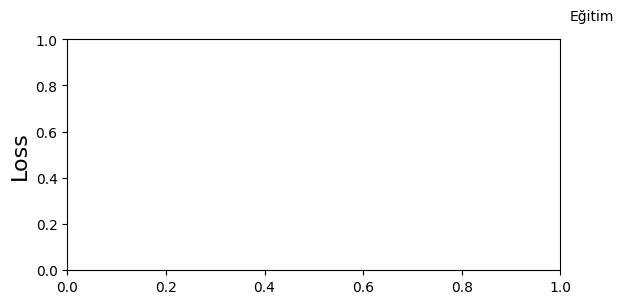

In [37]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model.history['loss'], color ='r', label='Training Loss')
plt.plot(model.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(model.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()


1/1 [==============================] - 0s 17ms/step


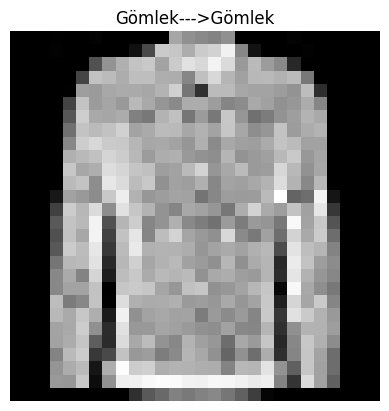

In [56]:
idx2=random.randint(0,(len(y_test)))
plt.imshow(x_test[idx2,:],cmap="gray")
y_pred=(model.predict(x_test[idx2,:].reshape(1,28,28,1)))
plt.axis("off")
plt.title(f"{fashion_mnist_labels[np.argmax(y_test[idx2])]}--->{fashion_mnist_labels[np.argmax(y_pred)]}")
plt.show()